# <font  size="6" color='7A4CDE'> <b>Detecting Malicious and Benign Webpages </b></font> 


------------------
<font  size="6" color='7A4CDE'> <b>Overview </b></font> 

The goal of this project is to determine which pages that may be malicious based on the features of each pages. To achieving this goal, i started by loading the data to start understanded and do some cleaning and looking for which factors are most important in order to best classify pages,Also doing some visualization like heat map and pie chart to gain further insight.


plase open the file in jupyter nootbook to see it in full formate

--------------



<font  size="4" color='7A4CDE'> <b>Attributes of My Dataset </b></font> 

<font  size="2" color='7A4CDE'>1.</font>   <font  size="2" color='black'> url: URL of the Webpage.
    </font>	

<font  size="2" color='7A4CDE'> 2.</font>   <font  size="2" color='black'> url_len: Length of URL (count of characters in a URL).</font>	

<font  size="2" color='7A4CDE'> 3.</font>   <font  size="2" color='black'>ip_add: IP Address of the webpage.</font>	

<font  size="2" color='7A4CDE'> 4.</font>   <font  size="2" color='black'> geo_loc: Name of the country based on IP Address location.</font>	

<font  size="2" color='7A4CDE'> 5.</font>   <font  size="2" color='black'> tld: Top Level Domain of the webpage.</font>	

<font  size="2" color='7A4CDE'> 6.</font>   <font  size="2" color='black'> who_is: Gives out whether the WHO IS information of the registered domain is complete or incomplete.</font>	

<font  size="2" color='7A4CDE'> 7.</font>   <font  size="2" color='black'> https:	Gives out whether the website uses https or http protocol.</font>	

<font  size="2" color='7A4CDE'> 8.</font>   <font  size="2" color='black'> js_len: Length of JavaScript code (in KB) in the webpage.</font>	

<font  size="2" color='7A4CDE'> 9.</font>   <font  size="2" color='black'> js_obf_len: Length of Obfuscated JavaScript (in KB) in the webpage.</font>	


<font  size="2" color='7A4CDE'> 10.</font>   <font  size="2" color='black'> label: Classification label categorizing the webpage class as Malicious (bad) or Benign (good).</font>	

-----------------------------------

In [58]:
import pandas as pd
import numpy as np
import numpy as ps
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
Data = pd.read_excel(r"C:\Users\96655\Desktop\MVP\Webpages_Dataset.xlsx")

In [102]:
## Observe the data to make sure it is properly loaded
Data.head()

,url,url_len,ip_add,geo_loc,tld,who_is,https,js_len,js_obf_len,label
0,http://www.yusheng-wiremesh.com/,32,211.229.153.97,South Korea,com,incomplete,yes,47.0,0.0,good
1,http://www.sunandmoonacupuncture.com/,37,161.11.77.63,United States,com,complete,yes,117.0,0.0,good
2,http://www.cheatscodesguides.com/playstation-2...,70,210.198.43.183,NaN,com,incomplete,yes,144.0,0.0,good
3,http://www.bhg.com/home/salad-recipes.html,42,50.138.83.15,United States,com,complete,yes,72.5,0.0,good
4,http://www.sacred-texts.com/aus/peck/,37,201.29.133.18,Brazil,com,complete,yes,59.0,0.0,good


In [103]:
# info give us summary of the date in glance
# we can see we have 10 feature with 5000 data points, in colums geo_loc we have null value
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   url         5000 non-null   object 
 1   url_len     5000 non-null   int64  
 2   ip_add      5000 non-null   object 
 3   geo_loc     4934 non-null   object 
 4   tld         5000 non-null   object 
 5   who_is      5000 non-null   object 
 6   https       5000 non-null   object 
 7   js_len      5000 non-null   float64
 8   js_obf_len  5000 non-null   float64
 9   label       5000 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 390.8+ KB


In [104]:
Data['label'].value_counts()

good    3843
bad     1157
Name: label, dtype: int64

-------------------

In [105]:
Data['geo_loc'].isnull().sum()

66

 in column <font  size="2" color='7A4CDE'> geo_loc, </font> there are 66 rows with null value, in this situation, imputing it with mode is not preferred because it will make wrong information and since the number of null rows is not so much, dropping the entire rows is the best chose.

In [106]:
Data = Data[Data['geo_loc'].notna()]

In [107]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4934 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   url         4934 non-null   object 
 1   url_len     4934 non-null   int64  
 2   ip_add      4934 non-null   object 
 3   geo_loc     4934 non-null   object 
 4   tld         4934 non-null   object 
 5   who_is      4934 non-null   object 
 6   https       4934 non-null   object 
 7   js_len      4934 non-null   float64
 8   js_obf_len  4934 non-null   float64
 9   label       4934 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 424.0+ KB


-------------------------------------------

In [68]:
Data.head()

,url,url_len,ip_add,geo_loc,tld,who_is,https,js_len,js_obf_len,label
0,http://www.yusheng-wiremesh.com/,32,211.229.153.97,South Korea,com,incomplete,yes,47.0,0.0,good
1,http://www.sunandmoonacupuncture.com/,37,161.11.77.63,United States,com,complete,yes,117.0,0.0,good
3,http://www.bhg.com/home/salad-recipes.html,42,50.138.83.15,United States,com,complete,yes,72.5,0.0,good
4,http://www.sacred-texts.com/aus/peck/,37,201.29.133.18,Brazil,com,complete,yes,59.0,0.0,good
5,http://www.csfixtures.com,25,148.7.184.189,Singapore,com,complete,no,166.0,0.0,good


the column <font  size="2" color='7A4CDE'> url </font> is similar to <font  size="2" color='7A4CDE'> ip_add </font>

if we want to reach to any page, we can by any one of them, So we can drop the column url since we do not need it and it is hard to be process

In [108]:
Data.drop(['url'], axis=1,inplace=True)

-------------------------


#### Since Machine learning algorithms can not handle categorical variables, we need to encoding them.

In [109]:
Data["https"].unique()

array(['yes', 'no'], dtype=object)

In [110]:
Data['https']=np.where(Data['https']=='yes',0,1)

Encoding the https Attribute

0 if the website with http protocol.

1 if the webpage with https protocol


----------------------

In [111]:
Data["who_is"].unique()

array(['incomplete', 'complete'], dtype=object)

In [112]:
Data['who_is']=np.where(Data['who_is']=='complete',0,1)

Encoding the who_is Attribute

0 if information of the registered domain is complete.

1 if information of the registered domain is incomplete



#### "geo_loc" and "tld" will be encoding as well

-----------------

# Pie Chart

In [113]:
Data.head()

,url_len,ip_add,geo_loc,tld,who_is,https,js_len,js_obf_len,label
0,32,211.229.153.97,South Korea,com,1,0,47.0,0.0,good
1,37,161.11.77.63,United States,com,0,0,117.0,0.0,good
3,42,50.138.83.15,United States,com,0,0,72.5,0.0,good
4,37,201.29.133.18,Brazil,com,0,0,59.0,0.0,good
5,25,148.7.184.189,Singapore,com,0,1,166.0,0.0,good


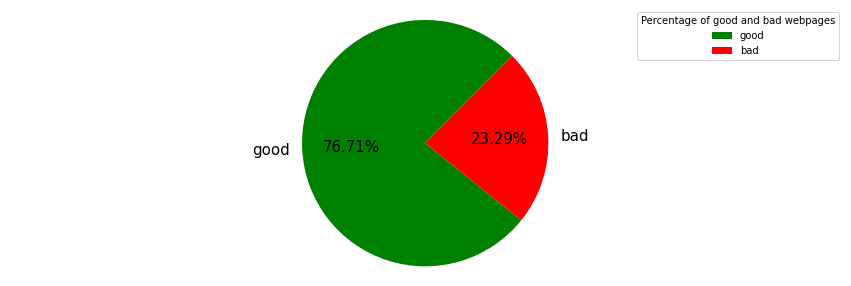

In [114]:
# Pie Chart of Malicious and Benign Webpages Distribution
labels = Data['label'].value_counts()
x =(list(labels.index), list(labels.values))
fig = plt.figure(figsize = (15,5))
Explode = [0,0.1]
plt.pie(x[1],labels=x[0],shadow=False,startangle=45,
        colors=['green','red'],autopct='%.2f%%',textprops={'fontsize': 15})
plt.axis('equal')
plt.legend(title='Percentage of good and bad webpages')
plt.show()

#### As we can see from above visualisation of pie chart, this dataset has two class, Good and bad. approximatlay quarter  of the results is belong to bad pages

#### So this show us the important of bulding our model as many pages around as may contains malicious 

# Heat map

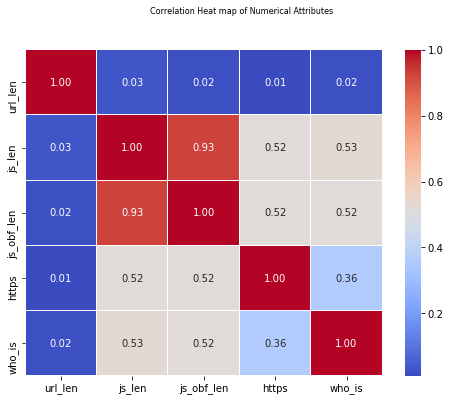

In [116]:
f, ax = plt.subplots(figsize=(8, 6))
corr = Data[['url_len','js_len','js_obf_len','https','who_is']].corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',linewidths=.05)
t= f.suptitle('Correlation Heat map of Numerical Attributes', fontsize=8)

#### From Above heat map, we see clearly 'js_len' and 'js_obf_len' are highly correlated and  very important feature in bulding the model